In [29]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [21]:
#tensor of 3 dimensions.
#0th dim: 2 elements (z-dim)
#1st dim: 4 elements (y-dim)
#2nd dim: 5 elements (x-dim, inner most dimension)


In [40]:
weight = 0.3
bias = 1 

#lets pretend that we dont know the above values, 
#if we are training with these 2 parameters, the goal of ANN is to first start with a random tensor value, 
#and then slowly make its way to the weight & bias value, giving an accurate prediciton

X = torch.arange(0,1,0.02).unsqueeze(dim=1)
y = weight * X + bias

#splitting our dataset in to train & test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
len(X)

50

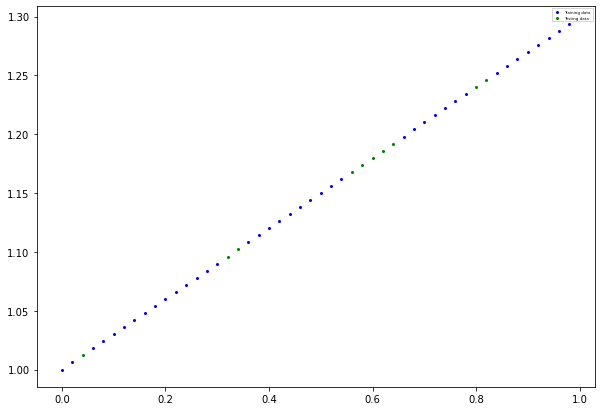

In [46]:
def plotPred(train_data=X_train, 
             train_labels=y_train,
             test_data=X_test,
             test_labels=y_test,
             predictions=None):
    plt.figure(figsize=(10,7))

    plt.scatter(train_data, train_labels, c='b', s=4, label="Training data")
    plt.scatter(test_data, test_labels, c='g', s=4, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", label = "Predictions")
    plt.legend(prop={"size":4})

plotPred()

## PyTorch modelling
* torch.nn - contains all buildings for computational graphs (neural network is a type of graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us. 
* torch.nn.Module - The base class for all neural network modules. If it is subclass-ed, please overwrite the "forward()" funtion
* torch.optim - optimizers. Helps with gradient descent. 
* requires_grad - When calling tensor.backward(), pytorch travels the graph in the reverse direction to help compute a new gradient.

In [12]:
torch.manual_seed(42)
class LinearRegressionMod(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True)) #parameter
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True)) #parameter.

        #usuall in a NN, PyTorch later from torch.nn will set these for us. 

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

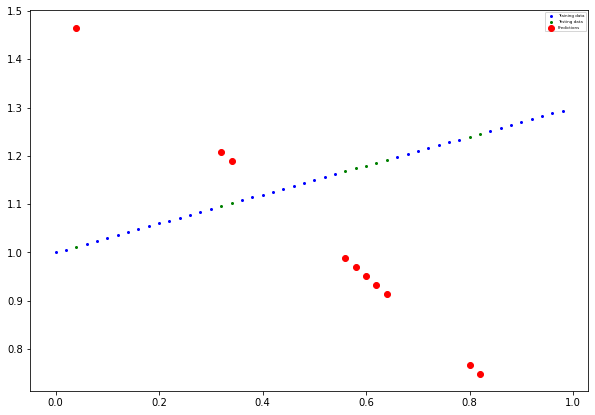

In [47]:
model_0 = LinearRegressionMod()
with torch.inference_mode():
    y_preds = model_0(X_test)

plotPred(predictions=y_preds)
#y_preds is generated randomly first. 

#inference mode turns off gradient tracking, because we dont need gradient descent when doing test data, 
# only train data. 


## Training the model 

The whole idea of training is for a model to move from some *unknown* parameter, to a *known* parameter.

* Loss function: A function to measure how **"wrong"** your model's predicitons are to the ideal outputs, lower is better. There are maybe around 15 loss functions. Each function is better suited for different types of data. 
    * Mean Absolute Error (L1 Loss)
* Optimizer: Takes into account the loss of a model and **adjusts** the model's parameters, to improve the loss funciton. In this case, it is weight and bias.

In other words, loss function is like a metric of our model, and the optimizer is the one thats actually changing values to appease the loss function. 

So we would need:
* Training Loop
* Testing Loop

**Q:** Which loss function and optimizer should I use? 

**A:** This is problem specific. But with experience, you'll get an idea of what works and what doesnt with my problem set. 

For example, a regression problem most likely requires a L1 loss, and optimizer like SGD.

But a classificaion problem might use BCELoss (binary cross entropy loss)

In [ ]:
#Setup a loss function
loss_fn = nn.L1Loss()

#for this loss function, we are trying to minimize the space between the predictions and actual data.


#Setup an optimizer. (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.paramaters(), lr=0.01)

#lr is learning rate, which is the step value where the optimizer changes the parameter values. 